In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

61.84513498678746 172.97274732991258
42.94628889047431 106.61747504316321
39.59358021271723 145.28028772565074
-79.40579259818216 -75.09677938868579
58.74997023659989 155.82869572007883
87.18117837939465 117.30303056304189
65.79281651285501 -139.10146945244452
82.01412056743894 -116.05313904122715
74.98205541349768 174.41592259700434
-2.266696513531002 -109.21928230213776
-34.66576413593796 9.34246967081782
1.5264002897735338 176.31325197827675
-10.009817463199681 88.21539911363334
-43.978038835525076 115.20299716004627
45.926077359384806 -0.4770079762155035
-68.95562034245994 154.40759649306165
75.90119653783913 23.930783832016232
53.35552615083586 20.327857405102634
-32.13357557386908 -107.56954364729745
68.59550228534957 97.33571672609389
62.93987763230777 82.4269725636313
26.742805855349488 -107.12612684691942
74.9583012422255 -53.950211170937294
48.77438435335645 -148.8994746294809
53.95832578469364 105.26434995145661
86.47135165989474 -70.63569311767229
-56.509046860944046 125.58

34.67577802543674 23.510798513588327
28.168366295928394 -54.52166417471142
-30.29790962272436 163.71303623617916
29.77208422214032 -32.41115352383156
-6.254720891032335 -166.59938666926746
-19.61864069497446 -108.33901246424556
-79.01306363174697 135.38570066524528
72.37760571961843 116.74280296910484
-6.103765511160091 -11.106863275276709
70.09507056920677 -146.31618496151694
-57.69175197930787 -166.7498658890605
32.59833946931764 172.61200491959073
18.745272330773346 -72.32810853694653
-73.26591520116179 76.4180254426617
-64.34954880073772 -3.9079996946212248
40.968087968021166 157.64067610236157
9.43714651207604 -174.54050296844338
18.43338915814438 137.81933224991195
80.97265406628458 -80.54000550979863
72.64519585579532 -163.7052440161376
48.38162819259321 148.53810495906322
-52.75895711287668 -174.71978001320176
-8.991333085270071 -97.5240586372019
-75.32480316175779 166.18877632957316
-32.63272751650915 -68.11640800858552
-37.569537227749684 83.95176328106982
57.632419317171895 

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrival      ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrival Complete       ")
print("-----------------------------")

Beginning Data Retrival      
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | mandalgovi
Processing Record 3 of Set 1 | miyako
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | tigil
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | mayo
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | komsomolskiy
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | saldanha
Processing Record 12 of Set 1 | temaraia
City not found. Skipping...
Processing Record 13 of Set 1 | padang
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | saintes
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | havoysund
Processing Record 18 of Set 1 | nidzica
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | tura
Processing Record 21 of Set 1 | krasnoselkup
Processing Record 22 of Set 1 | guadalupe y calvo
Processing Record

Processing Record 36 of Set 4 | bilibino
Processing Record 37 of Set 4 | barroso
Processing Record 38 of Set 4 | mindelo
Processing Record 39 of Set 4 | honiara
Processing Record 40 of Set 4 | lagoa
Processing Record 41 of Set 4 | coahuayana
Processing Record 42 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 43 of Set 4 | tiksi
Processing Record 44 of Set 4 | tarakan
Processing Record 45 of Set 4 | mitsamiouli
Processing Record 46 of Set 4 | the valley
Processing Record 47 of Set 4 | lompoc
Processing Record 48 of Set 4 | yialos
City not found. Skipping...
Processing Record 49 of Set 4 | clyde river
Processing Record 50 of Set 4 | flin flon
Processing Record 1 of Set 5 | salalah
Processing Record 2 of Set 5 | takoradi
Processing Record 3 of Set 5 | ngukurr
City not found. Skipping...
Processing Record 4 of Set 5 | souillac
Processing Record 5 of Set 5 | rustenburg
Processing Record 6 of Set 5 | port hedland
Processing Record 7 of Set 5 | castro
Processing Record 

Processing Record 22 of Set 8 | galgani
City not found. Skipping...
Processing Record 23 of Set 8 | lerwick
Processing Record 24 of Set 8 | makakilo city
Processing Record 25 of Set 8 | kapit
Processing Record 26 of Set 8 | muana
Processing Record 27 of Set 8 | pevek
Processing Record 28 of Set 8 | kutum
Processing Record 29 of Set 8 | touros
Processing Record 30 of Set 8 | dakar
Processing Record 31 of Set 8 | kastamonu
Processing Record 32 of Set 8 | fairview
Processing Record 33 of Set 8 | aykhal
Processing Record 34 of Set 8 | klaksvik
Processing Record 35 of Set 8 | bogdana
Processing Record 36 of Set 8 | kununurra
Processing Record 37 of Set 8 | rio grande
Processing Record 38 of Set 8 | east london
Processing Record 39 of Set 8 | matveyevka
Processing Record 40 of Set 8 | khonuu
City not found. Skipping...
Processing Record 41 of Set 8 | kawalu
Processing Record 42 of Set 8 | aleksandrov gay
Processing Record 43 of Set 8 | xuanhua
Processing Record 44 of Set 8 | pervomayskoye
Pr

Processing Record 10 of Set 12 | asht
City not found. Skipping...
Processing Record 11 of Set 12 | ahipara
Processing Record 12 of Set 12 | noumea
Processing Record 13 of Set 12 | samusu
City not found. Skipping...
Processing Record 14 of Set 12 | delmas
Processing Record 15 of Set 12 | vostok
Processing Record 16 of Set 12 | san martin
Processing Record 17 of Set 12 | castle rock
Processing Record 18 of Set 12 | kashi
Processing Record 19 of Set 12 | santarem
Processing Record 20 of Set 12 | karratha
Processing Record 21 of Set 12 | south lake tahoe
Processing Record 22 of Set 12 | srivardhan
Processing Record 23 of Set 12 | bronnoysund
Processing Record 24 of Set 12 | yuzhnyy
Processing Record 25 of Set 12 | vila velha
Processing Record 26 of Set 12 | satitoa
City not found. Skipping...
Processing Record 27 of Set 12 | guerrero negro
Processing Record 28 of Set 12 | cayenne
Processing Record 29 of Set 12 | namatanai
Processing Record 30 of Set 12 | chimbote
Processing Record 31 of Se

In [10]:
len(city_data)

567

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Anadyr,64.7500,177.4833,14.50,85,75,6.71,RU,2022-10-16 19:32:08
1,Mandalgovi,45.7625,106.2708,25.72,40,0,7.40,MN,2022-10-16 19:32:08
2,Miyako,39.6367,141.9525,60.53,89,92,6.15,JP,2022-10-16 19:32:09
3,Ushuaia,-54.8000,-68.3000,49.66,40,0,4.61,AR,2022-10-16 19:32:09
4,Tigil,57.8000,158.6667,27.61,95,93,4.81,RU,2022-10-16 19:32:10
5,Saskylakh,71.9167,114.0833,16.43,92,73,17.38,RU,2022-10-16 19:32:10
6,Mayo,38.8876,-76.5119,73.94,54,0,8.05,US,2022-10-16 19:32:11
7,Yellowknife,62.4560,-114.3525,30.72,93,75,16.11,CA,2022-10-16 19:32:11
8,Komsomolskiy,40.4272,71.7189,59.72,41,87,6.91,UZ,2022-10-16 19:32:11
9,Puerto Ayora,-0.7393,-90.3518,76.96,85,85,11.01,EC,2022-10-16 19:32:12


In [12]:
# Re-order the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Anadyr,RU,2022-10-16 19:32:08,64.7500,177.4833,14.50,85,75,6.71
1,Mandalgovi,MN,2022-10-16 19:32:08,45.7625,106.2708,25.72,40,0,7.40
2,Miyako,JP,2022-10-16 19:32:09,39.6367,141.9525,60.53,89,92,6.15
3,Ushuaia,AR,2022-10-16 19:32:09,-54.8000,-68.3000,49.66,40,0,4.61
4,Tigil,RU,2022-10-16 19:32:10,57.8000,158.6667,27.61,95,93,4.81
5,Saskylakh,RU,2022-10-16 19:32:10,71.9167,114.0833,16.43,92,73,17.38
6,Mayo,US,2022-10-16 19:32:11,38.8876,-76.5119,73.94,54,0,8.05
7,Yellowknife,CA,2022-10-16 19:32:11,62.4560,-114.3525,30.72,93,75,16.11
8,Komsomolskiy,UZ,2022-10-16 19:32:11,40.4272,71.7189,59.72,41,87,6.91
9,Puerto Ayora,EC,2022-10-16 19:32:12,-0.7393,-90.3518,76.96,85,85,11.01


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data\cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

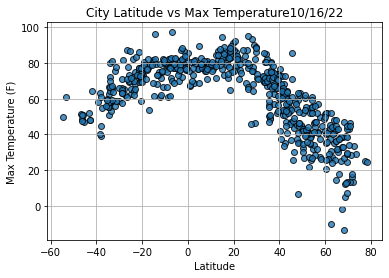

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolors="k", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data\Fig1.png")

# Show plot.
plt.show()

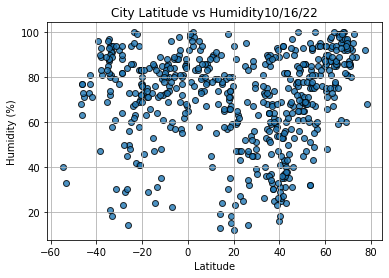

In [19]:
# Build the scatter plot for latitude vs. max humidity.
plt.scatter(lats, humidity, edgecolors="k", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Humidity" + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data\Fig2.png")

# Show plot.
plt.show()

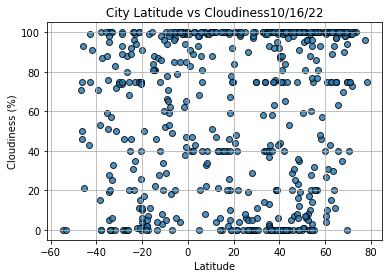

In [20]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolors="k", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Cloudiness" + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data\Fig3.png")

# Show plot.
plt.show()

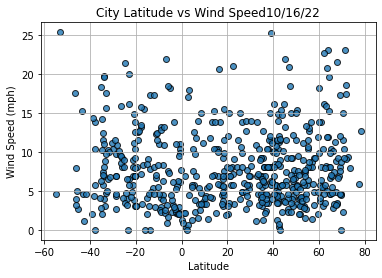

In [21]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolors="k", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data\Fig4.png")

# Show plot.
plt.show()